In [7]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

import sys
sys.path.append('C:/Users/jkahn/Documents/Schmidt/cfl')

from cfl.experiment import Experiment 

# Running CFL on the Data 

In [14]:
# load data 
data_id = 'questionnaire_36' # this data ID indicates the CFL setup with all questionnaire responses at week 0 for the X data and questionnaire data at week 36 for the Y data

X = np.load('X_' +'questionnaire_0'+ '.npy')
Y = np.load('Y_' + data_id+ '.npy')

which_week = data_id.split("_")[-1] # this should be "36"

In [15]:
print("X data shape: ", X.shape)
print("X data head: \n", X[:5])

print("Y data shape: ", Y.shape)
print("Y data head:\n", Y[:5])

X data shape:  (170, 83)
X data head: 
 [[1 1 2 0 1 1 1 1 2 1 2 1 0 1 2 1 1 2 0 0 1 0 1 2 1 2 1 1 0 0 1 2 0 1 2 2
  0 2 2 2 0 2 2 2 0 2 1 2 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 0 2 1 0 1 2 0 1
  1 0 1 1 0 1 0 0 0 0 0]
 [2 1 1 1 2 0 2 1 2 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 2 0 1 1 0 2 2 1 2 0 2 1
  0 2 0 2 0 1 2 1 0 2 2 0 2 0 2 2 0 0 2 0 2 2 2 1 2 1 0 0 2 1 0 0 0 0 0 1
  0 0 0 0 0 1 0 0 0 0 0]
 [2 1 2 0 2 1 2 2 2 2 2 1 1 2 1 1 1 1 0 1 2 2 2 1 1 1 0 0 2 2 2 2 0 2 2 1
  0 1 2 1 2 2 1 2 1 2 2 1 2 1 2 0 2 2 0 0 1 2 1 1 1 0 1 0 0 2 1 0 1 0 0 1
  2 1 0 0 2 1 0 0 0 0 0]
 [2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2
  0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 0 2 2 2 1 1 1 2 2 0 2 2 1 1 2 1 2
  0 0 0 0 0 0 0 0 0 0 0]
 [2 2 1 1 1 1 0 2 1 2 1 2 1 2 1 2 1 0 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2
  2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 1 2 1 1 2
  1 0 0 0 0 1 0 0 0 0 0]]
Y data shape:  (170, 83)
Y data head:
 [[1 1 2 0 1 0 1 1 1 1 2 2 0 1 0 0 0 1 0 1 2 0 1 1 1 1 1

In [16]:
# the parameters should be passed in dictionary form
data_info = {'X_dims' : X.shape,
             'Y_dims' : Y.shape,
             'Y_type' : 'categorical' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not
# allowed for data_info)
cde_params = {  'dense_units' : [100, 20, data_info['Y_dims'][1]], # model creation parameters
                'activations' : ['relu', 'linear', 'linear'],
                'dropouts'    : [0.2, 0, 0],

                'batch_size'  : 32, # parameters for training
                'n_epochs'    : 50,
                'optimizer'   : 'adam',
                'opt_config'  : {},
                'loss'        : 'mean_squared_error',
                'best'        : True,

                'verbose'     : 0, # amount of output to print
                'show_plot'   : True,
            }

cluster_params = {'x_model': KMeans(n_clusters=5), 'y_model': KMeans(n_clusters=5)}

# steps of this CFL pipeline
block_names = ['CondExpMod', 'Clusterer']
block_params = [cde_params, cluster_params]

# folder to save results to
save_path = 'initial_test'

# create the experiment!
my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, results_path=save_path)

All results from this run will be saved to initial_test\experiment0002
verbose specified but not used by this block type


In [17]:
print(my_exp.blocks[0].model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8400      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 83)                1743      
_________________________________________________________________
dropout_2 (Dropout)          (None, 83)                0         
Total params: 12,163
Trainable params: 12,163
Non-trainable params: 0
____________________________________________________

Training CFL pipeline.


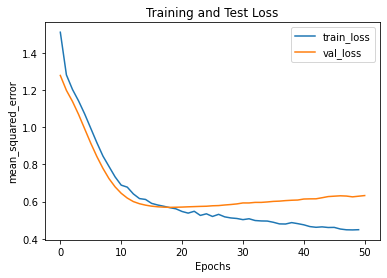

In [7]:
results = my_exp.train()

In [17]:
pyx = results['CondExpMod']['pyx']
pyx[0]

array([ 1.2658    ,  0.9957806 ,  1.0087715 ,  0.9715356 ,  1.4696643 ,
        0.6804947 ,  1.0042238 ,  0.9046529 ,  1.1492097 ,  1.3082554 ,
        1.5664748 ,  1.2728697 ,  0.39211524,  1.032159  ,  0.5579625 ,
        0.6750323 ,  0.6536727 ,  0.7494821 ,  0.49765185,  0.7718099 ,
        1.2483478 ,  0.6909142 ,  1.4940766 ,  0.662622  ,  1.1901547 ,
        0.54316425,  1.3395723 ,  0.841265  ,  0.8858381 ,  0.93928826,
        0.9563623 ,  1.116518  ,  0.84504825,  1.5564936 ,  1.1524802 ,
        1.1828991 ,  0.7734354 ,  1.1950144 ,  1.1373664 ,  1.1615744 ,
        0.79104716,  1.036473  ,  1.4532659 ,  1.6820985 ,  1.2010596 ,
        0.69852626,  1.1984739 ,  1.2124033 ,  1.4784434 ,  1.3169068 ,
        1.2406726 ,  1.286895  ,  1.1907276 ,  0.964398  ,  0.82001203,
        1.1818981 ,  1.332341  ,  1.6422262 ,  1.2170436 ,  1.0827228 ,
        0.88903403,  0.3854069 ,  0.39002538,  0.8048426 ,  0.03229367,
        0.8794069 ,  1.0474759 ,  0.36143807,  0.4750137 ,  0.44

In [8]:
x_lbls = results['Clusterer']['x_lbls']

## CDE Diagnostic: Comparing the CDE prediction of effect distribution with actual distribution

Text(0.5, 1.0, 'Difference between actual and expected values')

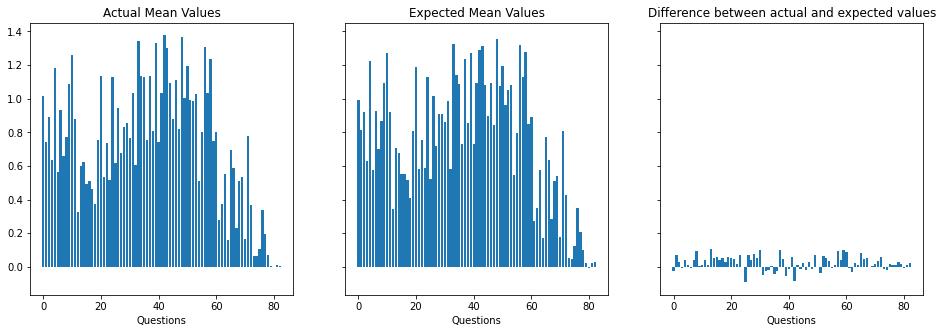

In [32]:
fig, axes = plt.subplots(nrows= 1, ncols=3, figsize=(16, 5), sharey=True)
    
for ax, values in zip(axes, (Y, pyx)):
    # get the global average for each questionnaire 
    mean_values = values.mean(axis=0)

    # then add the values to a bar chart 
    ax.bar(range(len(mean_values)), mean_values) 
    ax.set_xlabel("Questions")

    
actual_mean_values = Y.mean(axis=0)
expected_mean_values = pyx.mean(axis=0)

# then add the values to a bar chart 
axes[2].bar(range(len(actual_mean_values)), expected_mean_values - actual_mean_values) 
axes[2].set_xlabel("Questions")

axes[0].set_title("Actual Mean Values")
axes[1].set_title("Expected Mean Values")
axes[2].set_title("Difference between actual and expected values")

In [6]:
# idea: ^ same plots graphed by macro state 

In [10]:
x_lbls = results['Clusterer']['x_lbls']
print("X Macrovariables")
print("---------------------")
for x_macro_class in np.unique(x_lbls): 
    print("the number of samples in macrovariable class {} is {}".format(x_macro_class, np.sum(x_lbls==x_macro_class)))

y_lbls = results['Clusterer']['y_lbls']
print("\nY Macrovariables")
print("---------------------")
for y_macro_class in np.unique(y_lbls): 
    print("the number of samples in macrovariable class {} is {}".format(y_macro_class, np.sum(y_lbls==y_macro_class)))

X Macrovariables
---------------------
the number of samples in macrovariable class 0 is 44
the number of samples in macrovariable class 1 is 42
the number of samples in macrovariable class 2 is 20
the number of samples in macrovariable class 3 is 20
the number of samples in macrovariable class 4 is 44

Y Macrovariables
---------------------
the number of samples in macrovariable class 0 is 24
the number of samples in macrovariable class 1 is 41
the number of samples in macrovariable class 2 is 37
the number of samples in macrovariable class 3 is 38
the number of samples in macrovariable class 4 is 30


## Plots to Interpret Results 


- want to see in our states how madison's factors fit in (highlight madison's factors in the full graph somehow) 


In [38]:
Y[np.where(x_lbls==0)].shape

(44, 83)

In [ ]:
# load the full, original data set for the visualization below
path_to_folder = os.path.join('IMPACT_CausalFeatureLearning', 'Data')
full_data = pd.read_csv(os.path.join(path_to_folder, 'data_w0_36.csv'), engine='python')

def create_col_and_color_lists(df, test_types): 
    '''
    creates a list of all the questionnaire columns in the avgs df, organized by test type
    and creates another list, aligned to the first, that contains color assignments
    '''
    colors = ['r', 'b', 'g', 'y']
    all_test_columns= []
    colors_by_col = []

    for i in range(len(test_types)): 
        test_type=test_types[i]
        current_color = colors[i]

        # get the columns that contain the current test type 
        curr_tests = [col for col in df.columns if test_type in col]
        all_test_columns.extend(curr_tests)
        colors_by_col.extend(current_color * len(curr_tests))
    return all_test_columns, colors_by_col

Text(0.5, 0.98, 'Global-mean-adjusted Questionnaire Scores')

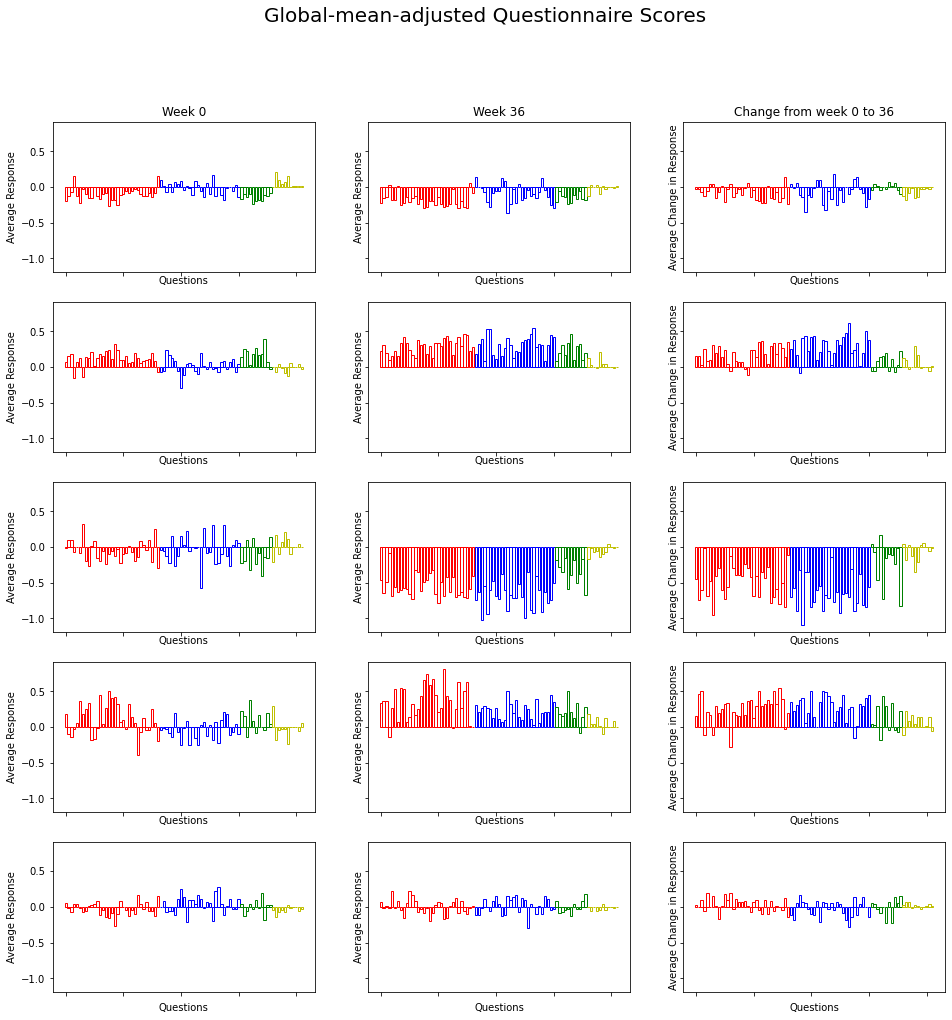

In [47]:
n_clusters = len(np.unique(x_lbls))
fig, axes = plt.subplots(nrows= n_clusters, ncols=3, figsize=(16, 16), sharex=True, sharey=True)

_, colors_by_col = create_col_and_color_lists(full_data, ['mf', 'rc', 'lo', 'bc'])


# for each macrovariable class: 
for i, ax_row in zip(range(n_clusters), axes): 
    
    # from left to right, subplots are X (week 0 data), Y (week 36 data), and change from 0 to 36 
    for data, ax in zip([X, Y, Y - X], ax_row): 
        # get the global average change for each question 
        global_mean = data.mean(axis=0)

        # get the mean for that macrovariable
        current_macrovar_mean = data[np.where(x_lbls==i)].mean(axis=0)

        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(range(Y.shape[1]), global_adj_macrovar_mean, edgecolor=colors_by_col, color="None")
         

        # add axis labels 
        ax.set_xlabel("Questions")
        ax.set_ylabel("Average Response")

        # hide axis tick labels
        ax.set_xticklabels(labels=[]) 

    # make last one represent change
    ax_row[2].set_ylabel("Average Change in Response")


axes[0][0].set_title("Week 0")
axes[0][1].set_title("Week 36")
axes[0][2].set_title("Change from week 0 to 36")
fig.suptitle("Global-mean-adjusted Questionnaire Scores", fontsize=20)

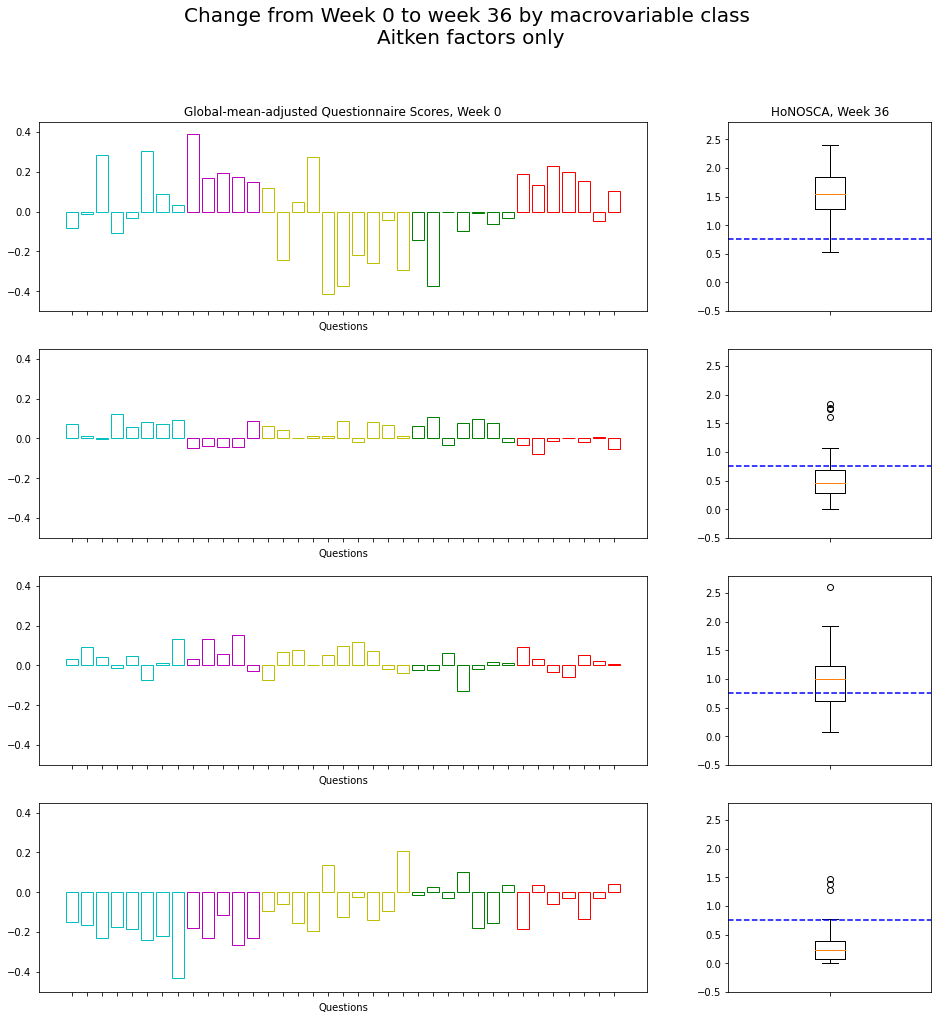

In [180]:
# taken from Aitken paper 
melancholic_features = ['mf2c', 'mf5c', 'mf6c', 'mf10c', 'mf12c', 'mf13c', 'mf21c', 'mf29c']
depressive_cognititons = ['mf16c', 'mf17c', 'mf18c', 'mf19c', 'mf28c']
anxiety =  ['mf31c', 'rc2c', 'rc3c', 'rc6c', 'rc9c', 'rc17c', 'rc21c',
'rc22c', 'rc26c', 'rc28c']
oc = ['lo1c', 'lo3c', 'lo4c', 'lo6c', 'lo7c', 'lo9c', 'lo10c']
antisocial = [ 'bc1c', 'bc2c', 'bc3c', 'bc4c', 'bc5c', 'bc7c', 'bc10c']
aitken_factors = melancholic_features + depressive_cognititons + anxiety + oc + antisocial


avgs_df = create_X_avgs_df(full_data, x_lbls, aitken_factors)

colors_by_col = ['c'] * len(melancholic_features) + ['m'] * len(depressive_cognititons) +  ['y'] * len(anxiety) + ['g']*len(oc) + ['r']*len(antisocial)

create_cfl_data_plot(avgs_df, Y, x_lbls, aitken_factors, colors_by_col,  "Change from Week 0 to week {} by macrovariable class \nAitken factors only".format(which_week))

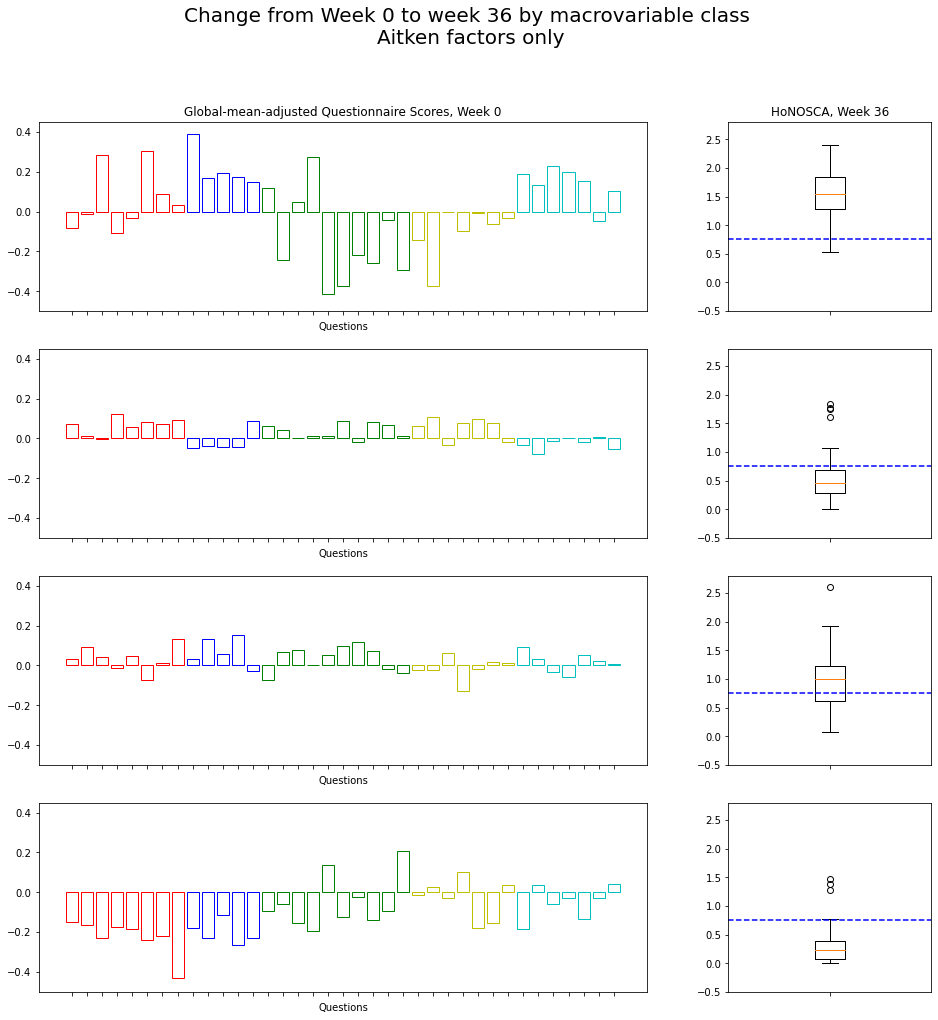

- add in HoNOSCA at week 0 - how are subjects changing after treatment? 
- want to see in our states how madison's factors fit in (highlight the original )



1. get clear on factor analysis/ what Madison did (could we reconstruct what she did? )
2. how do factor analysis results map onto cfl results? 
    - if factor analysis results were perfect and clear, what would we expect to see plugging in the same data to CFL? 
3. graph CFL output with seeing where Madison's factors fit in 


4. just run CFL on the questions used for the factors 


5. change cfl data to questionnaire results before and after? 


### next steps: 

tuning # of clusters - sankey diagram (nice to look at)

(stick with kmeans for now )

neural net - not great right now - best kind of CDE for categorical data? 


Visualizing clusters: 
- (we want to see how many members are in each cluster)

first idea: 
- take the spaghetti plots of effect: either make k subplots (for each of k clusters) and graph subjects for each cluster   -- or one subplot with k lines (average value for each member of cluster)
- or the likert diagrams from before to after for each cluster 


Another idea that Cindy will think about 
- see how ecah factor in the paper was determined 
- see if the people in each group load differently for ^these factors (are we grouping people based on how they exhibit these different factors? ) 

- how do people in each CFL cluster score for each of the Aitken factors?




Idea for approach: 
1. Pick one of the weeks (12 or 36)
2. pick a number of clusters (see how many madison chose as a starting point [in paper])
3. set up the pipeline


other thing to check against paper: what (if any) of other information was useful (treatment, sex, location, etc)
- try making a correlation with <vector of everything up until hoNOSCA> and <hoNOSCA> 
^ if sex, etc., has a huge effect, we might see that in this preliminary check 

Text(0.5, 0.98, 'Global mean-adjusted questionnaire scores, Week 0')

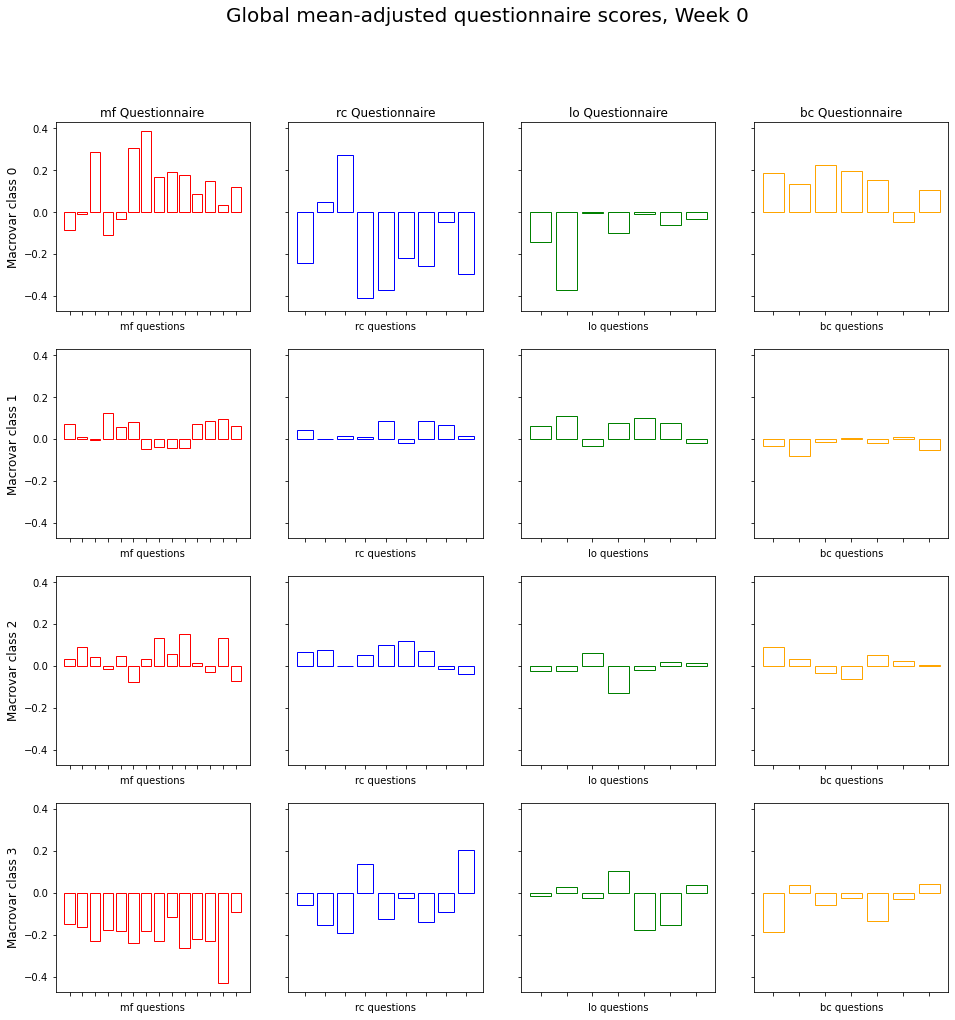

In [87]:
# now graph the difference between the global mean and the averages from each macrovariable class, colored by class 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
colors = ['red', 'blue', 'green', 'orange']

firstrow = True
# for each macrovariable class: 
for i, ax_row in zip(range(len(avgs_df))[:-1], axes): 

    # for each questionnaire: 
    for j, ax in zip(range(4), ax_row): 
        test_type = ['mf', 'rc', 'lo', 'bc'][j]

        # get only the columns that contain the current test type 
        test_columns = [col for col in avgs_df.columns if test_type in col]

        # get the global average change for the relevant questionnaire
        global_mean= avgs_df.loc[:, test_columns].iloc[[0]].values[0]

        # get the mean for that macrovariable
        current_macrovar_mean = avgs_df.loc[:, test_columns].iloc[[i+1]].values[0]#skip first row, which contains global avgs

        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(test_columns, global_adj_macrovar_mean, edgecolor=colors[j], color="None") #manually making sure the same color is associated w same questionnaire each time

        ax.set_xlabel("{} questions".format(test_type))
        ax.set_xticklabels(labels=[]) # hide axis tick labels

        if firstrow: # set macrovar titles 
            ax_row[j].set_title("{} Questionnaire".format(test_type))


    firstrow=False
    ax_row[0].set_ylabel("Macrovar class {}".format(i), fontsize=12)


# # axes[0].set_ylabel("Change in Avg Scores")
# # axes[2].set_ylabel("Change in Avg Scores")

fig.suptitle("Global mean-adjusted questionnaire scores, Week 0", fontsize=20)


Text(0.5, 0.98, 'Change in HoNOSCA Scores from Week 0 to 36, by Cause Macrovariable Class')

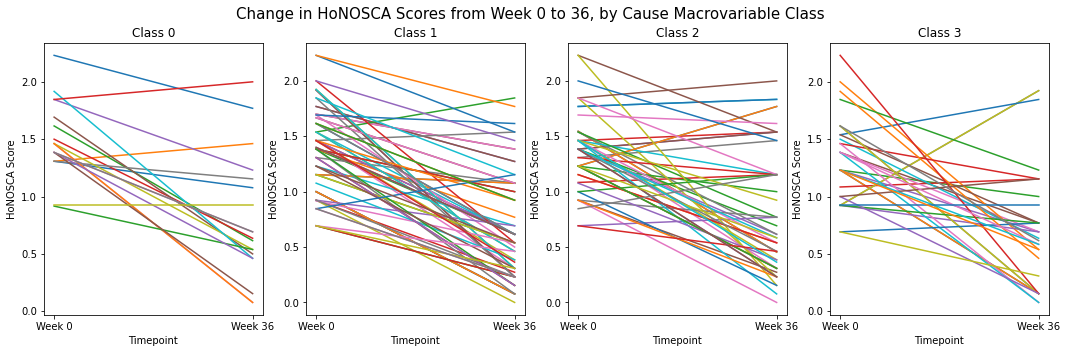

In [88]:
# - take the spaghetti plots of effect: either make k subplots (for each of k clusters) and graph subjects for each cluster   -- or one subplot with k lines (average value for each member of cluster)

timepoints = ['Week 0', 'Week '+ which_week]
num_subplots = len(np.unique(x_lbls))
fig, axes = plt.subplots(1, num_subplots, figsize=(18, 5))

all_ids = full_data["id"].values
for current_macrovar_class, ax in zip(np.unique(x_lbls), axes.flat): 

    # get only the columns that contain the current X macrovariable 
    for i in range(len(x_lbls)): # for all samples.... 

        if x_lbls[i] == current_macrovar_class: 
            current_id = all_ids[i]
            week0_results = full_data.loc[(full_data.id==current_id) & (full_data.Time==0), 'HoNOSCA']
            weekLater_results = full_data.loc[(full_data.id==current_id) & (full_data.Time==int(which_week)), 'HoNOSCA']

        
            ax.plot(timepoints, (week0_results, weekLater_results))
        
        ax.set_title("Class {}".format(current_macrovar_class))
        ax.set_ylabel("HoNOSCA Score")
        ax.set_xlabel("Timepoint")
fig.suptitle("Change in HoNOSCA Scores from Week 0 to {}, by Cause Macrovariable Class".format(which_week), fontsize=15)

### (Sidebar: is the average of questionnaire results a good proxy for HoNOSCA score?)

In [89]:
# grab only the questionnaire results from week 0 
week0_results = full_data.loc[full_data.Time==0].iloc[:, 8:-1]

# grab only the questionnaire results from week 12/36 
weekLater_results = full_data.loc[full_data.Time==int(which_week)].iloc[:, 8:-1]

#average the results across all questions for each timepoint 
week0_average = week0_results.mean(axis=1).values
weekLater_average = weekLater_results.mean(axis=1).values

In [90]:
week0_HoNOSCA = full_data.loc[full_data.Time==0, "HoNOSCA"]
weekLater_HoNOSCA = full_data.loc[full_data.Time==int(which_week), "HoNOSCA"]

In [91]:
np.corrcoef(weekLater_average, weekLater_HoNOSCA)[0, 1]

0.6350730224222482

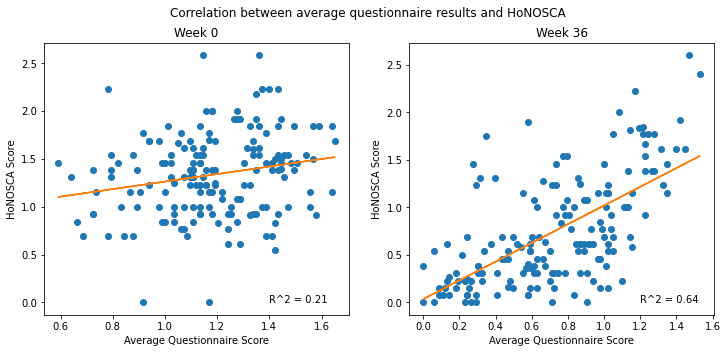

In [92]:
# TODO: check how well HoNOSCA value in week 0 , week 36 is predicted by questionnaire results 

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

##### Week 0 subplot
# create scatter plot 
axes[0].plot(week0_average, week0_HoNOSCA, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(week0_average, week0_HoNOSCA, 1)

#add linear regression line to scatterplot 
axes[0].plot(week0_average, m*week0_average+b)

# annotate with R^2 
axes[0].annotate("R^2 = {}".format(np.around(np.corrcoef(week0_average, week0_HoNOSCA)[0,1], 2)), xy=(1.4,0))
axes[0].set_title("Week 0") 

####### Week Later subplot
# create scatter plot 
axes[1].plot(weekLater_average, weekLater_HoNOSCA, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(weekLater_average, weekLater_HoNOSCA, 1)

#add linear regression line to scatterplot 
axes[1].plot(weekLater_average, m*weekLater_average+b)

# annotate with R^2 
axes[1].annotate("R^2 = {}".format(np.around(np.corrcoef(weekLater_average, weekLater_HoNOSCA)[0,1], 2)), xy=(1.2,0))
axes[1].set_title("Week {}".format(which_week)) 

plt.suptitle("Correlation between average questionnaire results and HoNOSCA")
for ax in axes.flat: 
    ax.set_xlabel("Average Questionnaire Score")
    ax.set_ylabel("HoNOSCA Score")

In [93]:
# for each questionnare: 
# x axis: each question variable 
# subtract global mean for each question 
# plot avg value for representatives from each macrovar class (color by macrovar class)

In [94]:
# temp_df shows the change from week 0 to week 12/36 for each questionnaire question and HoNOSCA

# create a new df with the same columns as the original data set 
temp_df = full_data.iloc[0:0].copy(deep=True)

#drop all the columns we don't need
temp_df = temp_df.drop(['arm', 'sessions', 'age', 'sex', 'region', 'site', 'Time'], axis = 1)  

quest_columns = temp_df.columns[1:] #all the columns corresponding to questionnaire/HoNOSCA results

# fill the df in with the difference at each ID between (week 0 and week-later)
for i in np.unique(full_data.id): # iterate over each subject
    week0 = full_data.loc[(full_data.id==i) & (full_data.Time==0), quest_columns]
    weekLater = full_data.loc[(full_data.id==i) & (full_data.Time==int(which_week)), quest_columns]

    x = weekLater.values - week0.values
    series = pd.Series(np.hstack((i, x[0])), temp_df.columns)
    temp_df = temp_df.append(series, ignore_index=True)

In [95]:
temp_df

,id,mf1c,mf2c,mf3c,mf4c,mf5c,mf6c,mf7c,mf8c,mf9c,...,bc3c,bc4c,bc5c,bc6c,bc7c,bc8c,bc9c,bc10c,bc11c,HoNOSCA
0,1106.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.076923
1,1107.0,-1.0,-1.0,1.0,-1.0,-2.0,0.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.923077
2,1110.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.090909
3,1111.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.230769
4,1113.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.070513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,3449.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,-1.0,-2.0,-2.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.275641
166,3450.0,-1.0,-2.0,-1.0,0.0,-1.0,-1.0,1.0,-2.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.384615
167,3458.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-2.0,-1.0,...,-2.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.559441
168,3459.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.384615


In [96]:
# what is the global mean change (week 12/36 minus week 0) for each questionnaire?

# create a new df with the same columns as the original data set 
avgs_df = temp_df.iloc[0:0].copy(deep=True)

# append a new row with the global averages to the dataframe
avgs_df = avgs_df.append(add_avg_column(temp_df, 'global_avg'), ignore_index=True)

# what is the mean change (week 12/36 minus week 0) for each question, for each samples in each CFL class ? 
# append a new row with the mean change for each CFL class 
for macrovar in np.unique(x_lbls): 
    name = str(macrovar) + '_avg'
    avgs_df = avgs_df.append(add_avg_column(temp_df, name, macrovar=macrovar, x_lbls=x_lbls), ignore_index=True) 

# mean change for each macrovar class - global mean change 


TypeError: add_avg_column() missing 1 required positional argument: 'week'

In [19]:
avgs_df

,id,mf1c,mf2c,mf3c,mf4c,mf5c,mf6c,mf7c,mf8c,mf9c,...,bc3c,bc4c,bc5c,bc6c,bc7c,bc8c,bc9c,bc10c,bc11c,HoNOSCA
0,global_avg,-0.747059,-0.658824,-0.452941,0.011765,-0.511765,-0.570588,-0.541176,-0.988235,-0.700000,...,-0.182353,-0.170588,-0.294118,-0.241176,-0.082353,0.000000,-0.005882,-0.041176,-0.041176,-0.585747
1,0_avg,-0.903846,-0.730769,-0.634615,0.096154,-0.519231,-0.615385,-0.692308,-1.019231,-0.961538,...,-0.096154,-0.115385,-0.269231,-0.173077,-0.057692,0.000000,0.000000,0.038462,0.000000,-0.632119
2,1_avg,-0.312500,-0.125000,-0.250000,-0.062500,-0.250000,-0.187500,0.000000,-0.500000,-0.312500,...,-0.312500,-0.375000,-0.437500,-0.125000,0.125000,0.000000,0.000000,-0.125000,0.000000,-0.107758
3,2_avg,-0.906977,-0.860465,-0.627907,-0.046512,-0.813953,-0.558140,-0.674419,-1.116279,-0.767442,...,-0.209302,-0.139535,-0.302326,-0.325581,-0.093023,0.023256,-0.023256,-0.069767,-0.139535,-0.828422
4,3_avg,-0.610169,-0.593220,-0.220339,0.000000,-0.355932,-0.644068,-0.457627,-1.000000,-0.525424,...,-0.203390,-0.186441,-0.271186,-0.271186,-0.152542,-0.016949,0.000000,-0.067797,-0.016949,-0.497635


<ipython-input-27-a81384c14417>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=test_columns,rotation=90)


Text(0.5, 0.98, 'Average global change from Week 0 to Week 36')

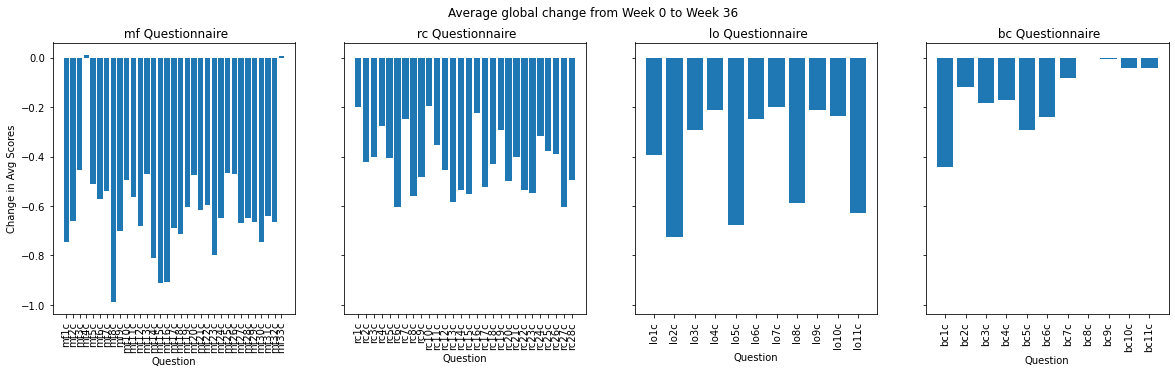

In [27]:
# for each test type:  (mf, rc, lo, bc)
    # graph the change for each question from week 0 to 12/36 

timepoints = ['Week 0', 'Week '+which_week]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)

for test_type, ax in zip(['mf', 'rc', 'lo', 'bc'], axes.flat): 

    # get only the columns that contain the current test type 
    test_columns = [col for col in temp_df.columns if test_type in col]

    # then make a bar chart for each question 
    ax.bar(test_columns, avgs_df.loc[:, test_columns].iloc[[0]].values[0])

    ax.set_xlabel("Question")
    ax.set_title(" {} Questionnaire".format(test_type))
    ax.set_xticklabels(labels=test_columns,rotation=90) 


axes[0].set_ylabel("Change in Avg Scores")

fig.suptitle("Average global change from Week 0 to Week {}".format(which_week))


Process to generate this graph: 
 
1. Calculate the change from week 0 to week 36 for each participant for each question (week36value - week0value)

2. Average those changes across all participants for each question (this is the GLOBAL MEAN)

3. Average those changes across all participants for each question within each CFL macrovariable class (these are CLASS MEANS)

4. For each CLASS MEAN, subtract out the GLOBAL MEAN for each question 

5. graph results of 4 

Text(0.5, 0.98, 'Global mean adjusted change in questionnaire scores from Week 0 to Week 36')

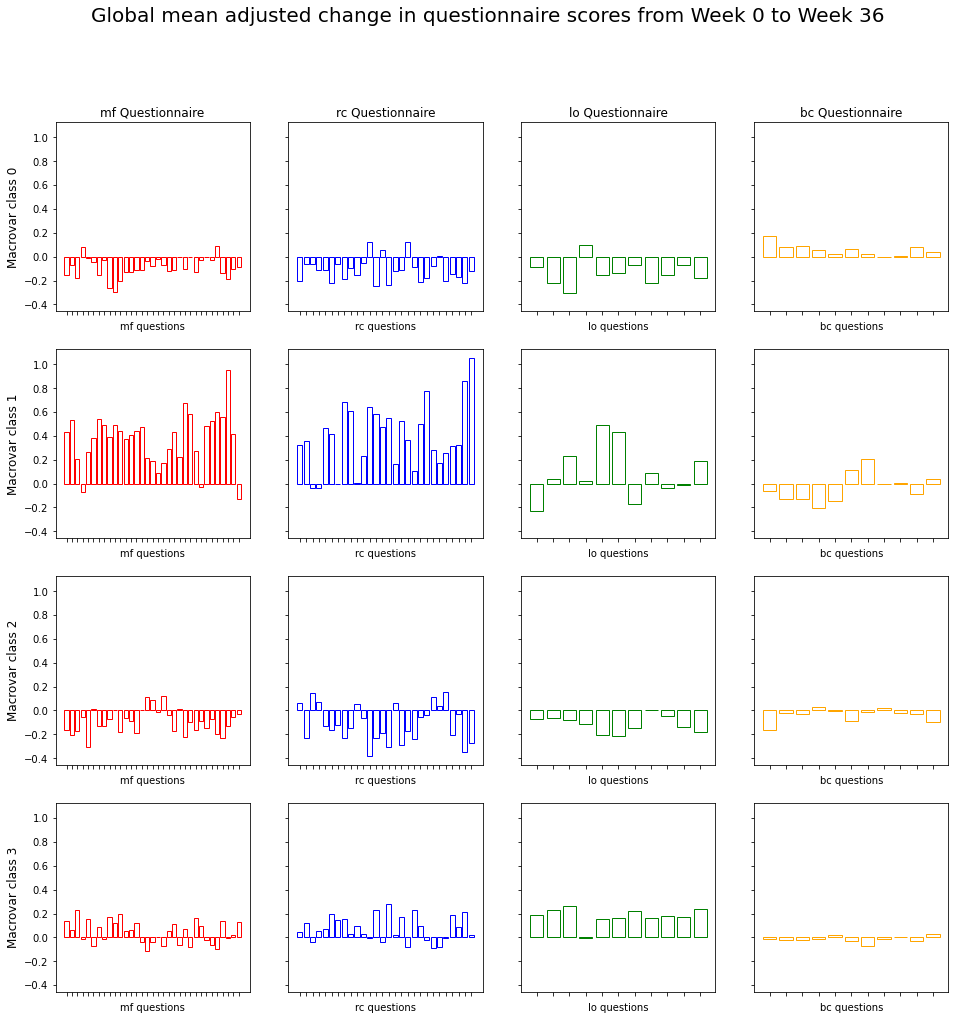

In [76]:
# now graph the difference between the global mean and the averages from each macrovariable class, colored by class 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
colors = ['red', 'blue', 'green', 'orange']
firstrow = True

# for each macrovariable class: 
for i, ax_row in zip(range(len(avgs_df))[:-1], axes): 

    # for each questionnaire: 
    for j, ax in zip(range(4), ax_row): 
        test_type = ['mf', 'rc', 'lo', 'bc'][j]

        # get only the columns that contain the current test type 
        test_columns = [col for col in temp_df.columns if test_type in col]

        # get the global average change for the relevant questionnaire
        global_mean= avgs_df.loc[:, test_columns].iloc[[0]].values[0]

        # get the mean for that macrovariable
        current_macrovar_mean = avgs_df.loc[:, test_columns].iloc[[i+1]].values[0]#skip first row, which contains global avgs

        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(test_columns, global_adj_macrovar_mean, edgecolor=colors[j], color="None") #manually making sure the same color is associated w same questionnaire each time

        ax.set_xlabel("{} questions".format(test_type))
        ax.set_xticklabels(labels=[]) # hide axis tick labels

        if firstrow: # set macrovar titles 
            ax_row[j].set_title("{} Questionnaire".format(test_type))


    firstrow=False
    ax_row[0].set_ylabel("Macrovar class {}".format(i), fontsize=12)


# # axes[0].set_ylabel("Change in Avg Scores")
# # axes[2].set_ylabel("Change in Avg Scores")

fig.suptitle("Global mean adjusted change in questionnaire scores from Week 0 to Week {}".format(which_week), fontsize=20)


In [ ]:
# ^ this same plot but with week 0 data, not change 
# show with extra subplot 1d scatter plot ofo honosca to right

In [ ]:
# same plots ^ but in terms of Madison's factors instead of questionnaires 
# (also: consider putting the questionnaire subplots into one plot and just coloring them )

In [ ]:
# what we are thinking about: how do we tell which questions are important for determining class membership? 

<ipython-input-47-5b767e626460>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=test_columns,rotation=90)


Text(0.5, 0.98, 'Average global change from Week 0 to Week 36')

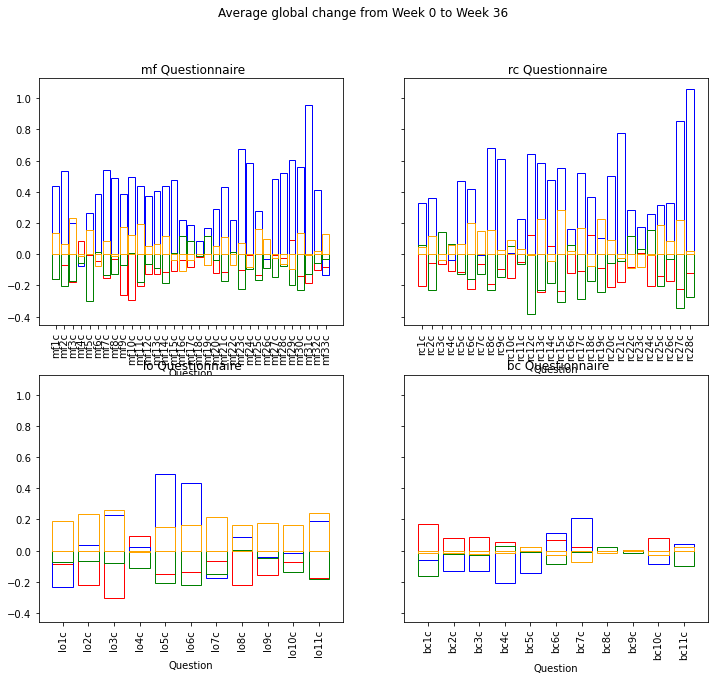

In [47]:
# now graph the difference between the global mean and the averages from each macrovariable class, colored by class 


timepoints = ['Week 0', 'Week '+which_week]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharey=True, squeeze=False)
colors = ['red', 'blue', 'green', 'orange']

for test_type, ax in zip(['mf', 'rc', 'lo', 'bc'], axes.flat): 

    # get only the columns that contain the current test type 
    test_columns = [col for col in temp_df.columns if test_type in col]

    # get the global average change 
    global_mean= avgs_df.loc[:, test_columns].iloc[[0]].values[0]

    # for each macrovariable: 
    for i in range(1, len(avgs_df)) : #skip first row, which contains global avgs
        # get the mean for that macrovariable
        current_macrovar_mean = avgs_df.loc[:, test_columns].iloc[[i]].values[0]
        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(test_columns, global_adj_macrovar_mean, edgecolor=colors[i-1], color="None" ) #manually making sure the same color is associated w same macrovar each time

    ax.set_xlabel("Question")
    ax.set_title(" {} Questionnaire".format(test_type))
    ax.set_xticklabels(labels=test_columns,rotation=90) 


# axes[0].set_ylabel("Change in Avg Scores")
# axes[2].set_ylabel("Change in Avg Scores")

fig.suptitle("Average global change from Week 0 to Week {}".format(which_week))


Text(0.5, 0.98, 'Global mean adjusted change from Week 0 to Week 36')

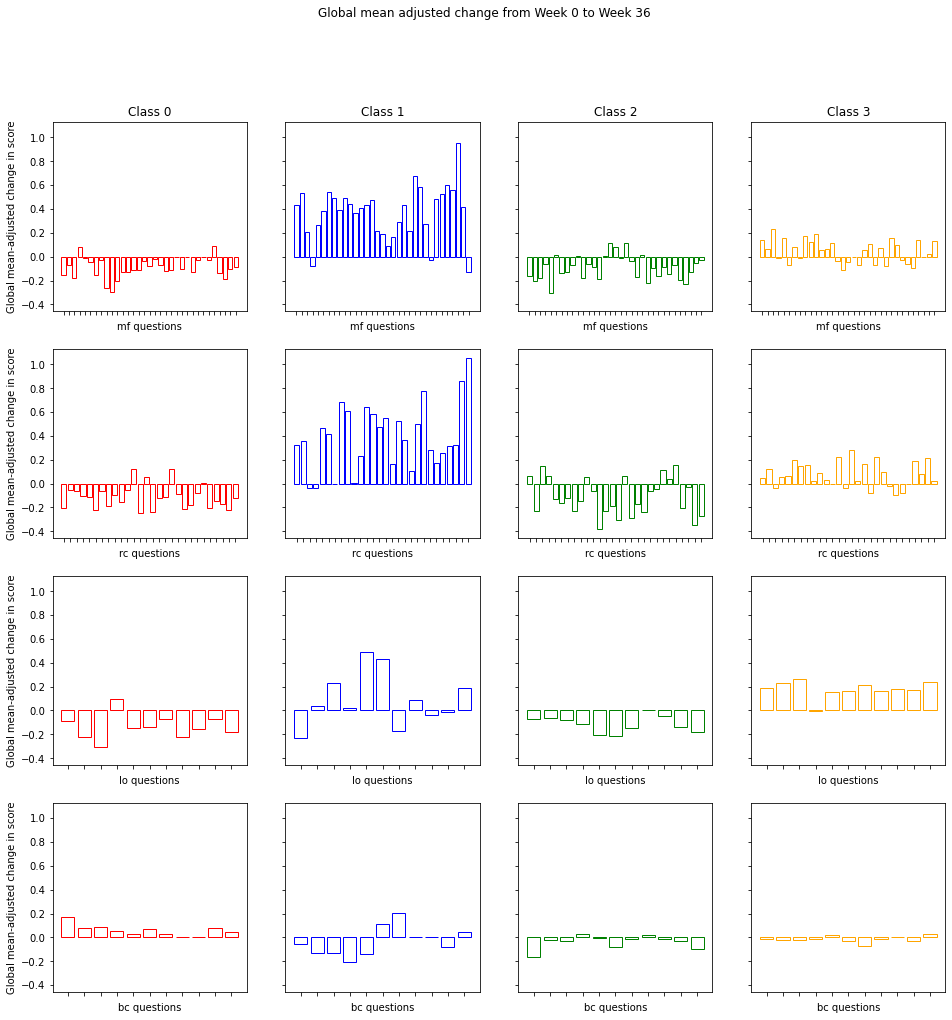

In [69]:
# now graph the difference between the global mean and the averages from each macrovariable class, colored by class 

timepoints = ['Week 0', 'Week '+which_week]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
colors = ['red', 'blue', 'green', 'orange']

firstrow = True

# for each questionnaire type: 
for test_type, ax_row in zip(['mf', 'rc', 'lo', 'bc'], axes): 

    # get only the columns that contain the current test type 
    test_columns = [col for col in temp_df.columns if test_type in col]

    # get the global average change 
    global_mean= avgs_df.loc[:, test_columns].iloc[[0]].values[0]

    # for each macrovariable: 
    for i, ax in zip(range(len(avgs_df))[:-1], ax_row): 
        # get the mean for that macrovariable
        current_macrovar_mean = avgs_df.loc[:, test_columns].iloc[[i+1]].values[0]#skip first row, which contains global avgs
        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(test_columns, global_adj_macrovar_mean, edgecolor=colors[i], color="None" ) #manually making sure the same color is associated w same macrovar each time

        ax.set_xlabel("{} questions".format(test_type))
        ax.set_xticklabels(labels=[]) # hide axis tick labels

        if firstrow: # set macrovar titles 
            ax_row[i].set_title("Class {}".format(i))


    firstrow=False
    ax_row[0].set_ylabel("Global mean-adjusted change in score")


# # axes[0].set_ylabel("Change in Avg Scores")
# # axes[2].set_ylabel("Change in Avg Scores")

fig.suptitle("Global mean adjusted change from Week 0 to Week {}".format(which_week))
